## 2.7 Fancy indexing

传递一个索引数组来一次性获得多个数组元素

In [2]:
import numpy as np
rand = np.random.RandomState(42)
x = rand.randint(100,size = 10)
print(x)

[51 92 14 71 60 20 82 86 74 74]


In [4]:
[x[3], x[7], x[2]]

[71, 86, 14]

In [5]:
ind  = [3, 7 , 4]

In [6]:
x [ind]

array([71, 86, 60])

In [7]:
ind = np.array([[3,7],
                         [4,5]])
x[ind]#结果的形状与索引数组的形状一直，而不是与被索引的数组的形状一致。

array([[71, 86],
       [60, 20]])

In [8]:
#也对多个维度使用
X = np.arange(12).reshape((3,4))
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [9]:
#与标准索引相同，第一个索引是行，第二个是列：
row = np.array([0,1,2])
col = np.array([2,1,3])
X[row,col]

array([ 2,  5, 11])

### 2.7.2 组合索引

In [15]:
a = np.arange(12).reshape(3,4)
print(a)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


In [16]:
a[2, [2, 0, 1]]# 取第三行 相应顺序的元素

array([10,  8,  9])

In [17]:
a[1:, [2, 0, 1]]

array([[ 6,  4,  5],
       [10,  8,  9]])

### 2.7.3 demo 选择随机点

有一个N × D的矩阵，表示D个维度的N个点：

In [30]:
mean = [0 , 0]
cov = [[1,2],
            [2,5]]
X = rand.multivariate_normal(mean,cov, 100)
X.shape

(100, 2)

可视化

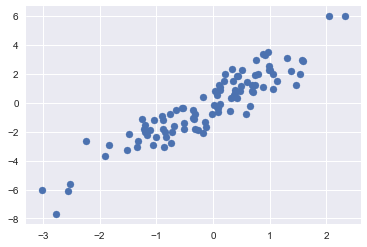

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
plt.scatter(X[:,0], X[:,1]);

In [23]:
#例用fancy indexing随机选取20个点 --不重复的索引值，并利用这些索引值找到相应的源数值
indices = np.random.choice(X.shape[0], 20, replace=False)
indices#选取的随机index

array([79, 32, 61, 11, 90, 23, 95, 36,  5, 38, 84, 16, 53, 34,  1, 69, 37,
       17, 71, 56])

In [24]:
selections = X[indices]

In [26]:
selections.shape

(20, 2)

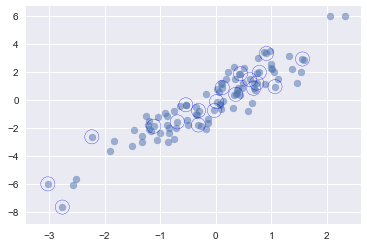

In [27]:
plt.scatter(X[:,0], X[:, 1], alpha=0.5)
plt.scatter(selections[:,0], selections[:,1],
           facecolor = "none", edgecolor  = 'b', s = 200);

### 2.7.4 例用fancy indexing修改值

In [31]:
x =np.arange(10)
i = np.array([1,2 ,3, 4])
x[i] = 99
x

array([ 0, 99, 99, 99, 99,  5,  6,  7,  8,  9])

### 2.7.5 demo 数据区间的划分

可以有效地将数据进行区间划分并手动创建直方图

In [33]:
np.random.seed(42)
x = np.random.randn(100)


In [34]:
#手动计算直方图
bins = np.linspace(-5, 5, 20)
counts =np.zeros_like(bins)


In [35]:
#为每个x找到合适的区间
i = np.searchsorted(bins,x)

In [36]:
#为每个区间加上1
np.add.at(counts, i, 1)

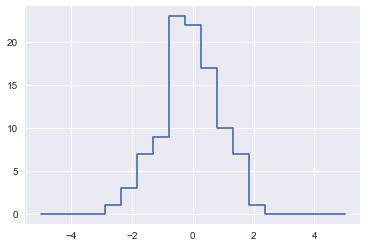

In [37]:
plt.plot(bins, counts, linestyle ="steps");